In [9]:
import pandas as pd

In [1]:
#best so far

import numpy as np
import random
import math
import os
import time

def read_tsp_file(filename):
    """
    Read TSP file and extract information.
    """
    with open(filename, 'r') as file:
        lines = file.readlines()
        num_locations = int(lines[0].strip())
        adjacency_matrix = np.zeros((num_locations, num_locations))
        for i in range(num_locations):
            distances = list(map(float, lines[i + 1].strip().split()))
            adjacency_matrix[i] = distances
    return num_locations, adjacency_matrix

def distance(city1, city2):
    """
    Calculate Euclidean distance between two cities.
    """
    return np.linalg.norm(city1 - city2)

def total_distance(cities_order, distances):
    """
    Calculate the total distance of the path.
    """
    total = 0
    num_cities = len(cities_order)
    for i in range(num_cities - 1):
        total += distances[cities_order[i], cities_order[i + 1]]
    total += distances[cities_order[-1], cities_order[0]]  # Return to the starting city
    return total

def two_opt_swap(route, i, j):
    """
    Perform a 2-opt swap on the route.
    """
    new_route = route[:i] + route[i:j+1][::-1] + route[j+1:]
    return new_route

def nearest_neighbor_heuristic(distances):
    """
    Initialize the solution using the nearest neighbor heuristic.
    """
    num_cities = len(distances)
    current_city = random.randint(0, num_cities - 1)
    unvisited_cities = set(range(num_cities))
    unvisited_cities.remove(current_city)
    route = [current_city]

    while unvisited_cities:
        nearest_city = min(unvisited_cities, key=lambda city: distances[current_city][city])
        route.append(nearest_city)
        unvisited_cities.remove(nearest_city)
        current_city = nearest_city

    return route

def simulated_annealing(adjacency_matrix, initial_temperature=10000, stopping_temperature=1e-6, num_iterations=10000):
    """
    Solve TSP using Simulated Annealing algorithm with 2-opt.
    """
    num_cities = len(adjacency_matrix)

    current_order = nearest_neighbor_heuristic(adjacency_matrix)
    current_cost = total_distance(current_order, adjacency_matrix)

    best_order = current_order.copy()
    best_cost = current_cost

    temperature = initial_temperature
    iteration = 0

    while temperature > stopping_temperature and iteration < num_iterations:
        # Generate a new solution
        i, j = sorted(random.sample(range(num_cities), 2))
        new_order = two_opt_swap(current_order, i, j)
        new_cost = total_distance(new_order, adjacency_matrix)

        # Acceptance probability based on new and current costs
        delta_cost = new_cost - current_cost
        if delta_cost < 0 or random.random() < math.exp(-delta_cost / temperature):
            current_order = new_order
            current_cost = new_cost

        # Keep track of the best solution found so far
        if current_cost < best_cost:
            best_order = current_order.copy()
            best_cost = current_cost

        # Cooling schedule: geometric cooling
        temperature *= 0.995
        iteration += 1

    return best_order, best_cost, total_distance(best_order, adjacency_matrix)


if __name__ == "__main__":
    folder_path = "/home/sgilango/Traveling-Salesman-Problem---AI/TestRuns/"
    file_name = "tsp-problem-100-100-100-25-1.txt"  # Example file name
    file_path = os.path.join(folder_path, file_name)

    num_locations, adjacency_matrix = read_tsp_file(file_path)

    start_time = time.time()
    best_order, best_cost, total_dist = simulated_annealing(adjacency_matrix)
    end_time = time.time()

    print("Best order:", best_order)
    print("Best cost:", best_cost)
    print("Total distance traveled:", total_dist)
    print("Execution time:", end_time - start_time, "seconds")


Best order: [2, 58, 30, 46, 3, 86, 13, 67, 80, 47, 65, 32, 87, 50, 66, 23, 59, 8, 9, 1, 60, 28, 5, 99, 35, 42, 4, 85, 89, 88, 33, 22, 95, 25, 37, 61, 53, 39, 57, 52, 43, 16, 44, 71, 10, 21, 82, 26, 69, 92, 45, 90, 31, 64, 11, 83, 40, 7, 73, 55, 0, 49, 15, 77, 17, 41, 70, 6, 20, 75, 98, 94, 14, 78, 62, 51, 97, 24, 91, 38, 27, 74, 48, 12, 54, 84, 93, 18, 29, 72, 56, 79, 19, 76, 68, 81, 36, 96, 63, 34]
Best cost: 4464.289367681084
Total distance traveled: 4464.289367681084
Execution time: 0.30726170539855957 seconds


In [7]:
def solve_tsp_files(folder_path):
    """
    Solve TSP for all .txt files in the given folder.
    """
    results = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".txt"):
            file_path = os.path.join(folder_path, file_name)
            print(file_path)
            num_locations, adjacency_matrix = read_tsp_file(file_path)
            start_time = time.time()
            best_order, best_cost, total_dist = simulated_annealing(adjacency_matrix)
            end_time = time.time()
            execution_time = end_time - start_time
            results.append([file_name, best_order, best_cost, execution_time])
    return results


In [ ]:
folder_path = "/home/sgilango/Traveling-Salesman-Problem---AI/TestRuns"  # Adjust folder path as needed

results = solve_tsp_files(folder_path)


In [10]:
df = pd.DataFrame(results, columns=['Input', 'Route', 'Best Distance', 'Time'])
print(df)
df.to_csv("results.csv")

                                Input  \
0    tsp-problem-800-100-150-45-1.txt   
1   tsp-problem-500-1000-150-35-1.txt   
2     tsp-problem-700-500-50-25-1.txt   
3    tsp-problem-1000-1000-50-5-1.txt   
4    tsp-problem-500-1000-100-5-1.txt   
5   tsp-problem-300-1000-150-45-1.txt   
6    tsp-problem-500-100-100-25-1.txt   
7   tsp-problem-400-5000-100-45-1.txt   
8    tsp-problem-900-1000-50-25-1.txt   
9    tsp-problem-200-1000-50-25-1.txt   
10   tsp-problem-100-100-100-25-1.txt   
11    tsp-problem-100-100-100-5-1.txt   

                                                Route  Best Distance      Time  
0   [283, 164, 9, 49, 43, 71, 168, 106, 36, 247, 8...   32445.700291  2.241399  
1   [485, 470, 154, 497, 26, 134, 7, 304, 120, 77,...   24417.977570  1.338234  
2   [676, 49, 235, 652, 23, 480, 34, 680, 378, 131...    2023.836259  1.910503  
3   [574, 266, 495, 329, 924, 298, 420, 866, 150, ...   37718.558381  2.845835  
4   [74, 202, 337, 158, 107, 79, 15, 479, 413, 159...   44047

<Figure size 1000x600 with 0 Axes>

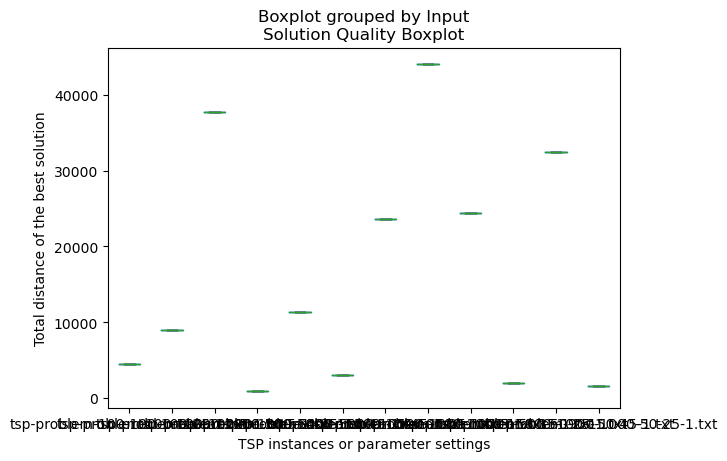

<Figure size 1000x600 with 0 Axes>

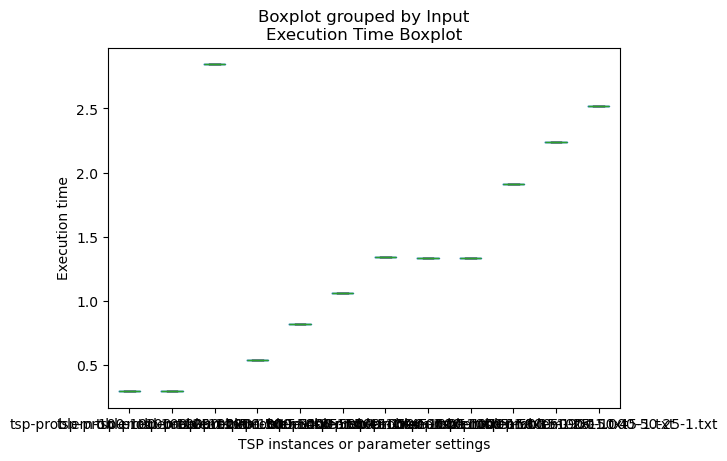

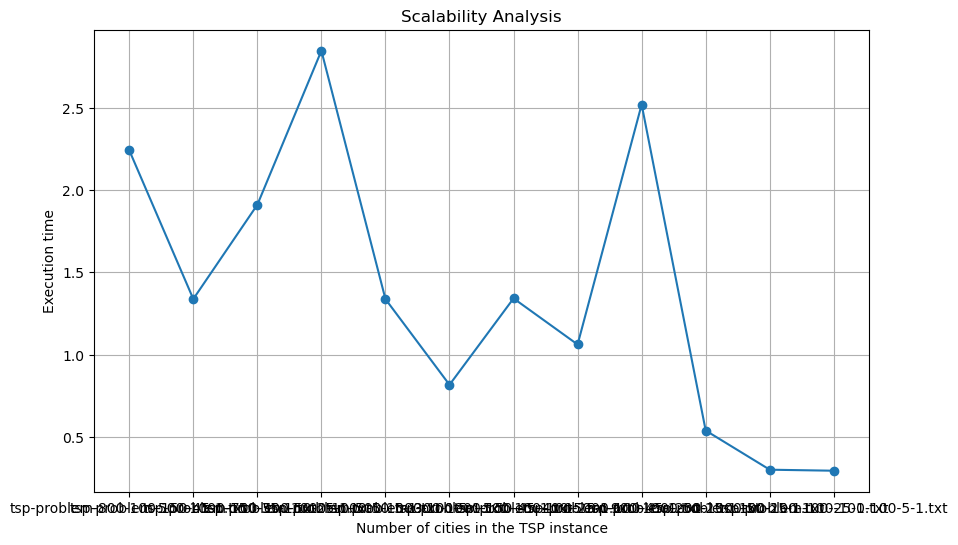

In [11]:
#plots

import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV file
data = pd.read_csv("results.csv")

# Solution Quality Boxplot
plt.figure(figsize=(10, 6))
data.boxplot(column='Best Distance', by='Input', grid=False)
plt.xlabel('TSP instances or parameter settings')
plt.ylabel('Total distance of the best solution')
plt.title('Solution Quality Boxplot')
plt.show()

# Execution Time Boxplot
plt.figure(figsize=(10, 6))
data.boxplot(column='Time', by='Input', grid=False)
plt.xlabel('TSP instances or parameter settings')
plt.ylabel('Execution time')
plt.title('Execution Time Boxplot')
plt.show()

# Scalability Analysis
plt.figure(figsize=(10, 6))
plt.plot(data['Input'], data['Time'], marker='o', linestyle='-')
plt.xlabel('Number of cities in the TSP instance')
plt.ylabel('Execution time')
plt.title('Scalability Analysis')
plt.grid(True)
plt.show()